# Network characterization (part 1)
In this notebook:
* Creation of four synthetic models 
* Comparison between synthetic models and RW
     * Degree
     * Clustering Coefficient
     * Connected Component Analysis
     * Density Analysis
     * Path Analysis
     * Centrality measures
     * Node Assortativity
    

### Load libraries and edgelist

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import powerlaw
import matplotlib.colors as mcolors
from operator import itemgetter
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette("Paired")
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
import pickle

In [2]:
df = pd.read_csv("../data_collection/data/df_nickname.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
df.username_mittente = df.username_mittente.astype(str)
df.username_ricevente = df.username_ricevente.astype(str)

g = nx.from_pandas_edgelist(df, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")

g_cc = nx.Graph(g)

In [3]:
nx.info(g)


'Name: \nType: MultiDiGraph\nNumber of nodes: 52795\nNumber of edges: 81063\nAverage in degree:   1.5354\nAverage out degree:   1.5354'

In [4]:
#saving the graph for gephi viz
nx.write_gexf(g, "grafoBLM.gexf")

### Functions

In [4]:
def find_hubs(G, degree_threshold):
    '''Function for extracting hubs and not hubs from the network'''
    hubs = []
    notHubs = []
    for i in G:
        if G.degree(i) >= degree_threshold:
            hubs.append(i)
        else:
            notHubs.append(i)
    print(len(hubs))
    return hubs, notHubs

def print_network_info(g):
    '''Function to print info about the network'''
    n_nodes = g.number_of_nodes()
    n_edges = g.number_of_edges()
    print ("Number of nodes: ", n_nodes)
    print ("Number of edges: ", n_edges)
    print ("Number of self-loop: ", nx.number_of_selfloops(g))
    print("Is directed graph: ", g.is_directed())
    l_max = ((n_nodes) * (n_nodes - 1)) / 2
    print("Max link number: ", l_max)
    avg_degree = (2*n_edges)/n_nodes
    print("Average degree: ", avg_degree)

def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.',c=sns.color_palette()[9])   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf(c=sns.color_palette()[9])
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf(c=sns.color_palette()[9])
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    

    
def draw_graph(g):
    plt.figure(figsize=(17,16))
    pos = nx.spring_layout(g, k =5)
    M = g.number_of_edges()
    edge_colors = range(2, M + 2)
    nodes = nx.draw_networkx_nodes(g, pos,node_size=300, node_color="#AAAAFF")
    edges = nx.draw_networkx_edges(g,pos,arrowstyle="->", arrowsize=8,  
                                   edge_color=edge_colors,
                                   edge_cmap=cmap, width = 1)
    nx.draw_networkx_labels(g, pos, font_size=20, font_color="black")
    plt.tight_layout()
    plt.show()
    

### Basic info

In [5]:
print_network_info(g)

Number of nodes:  52795
Number of edges:  81063
Number of self-loop:  1
Is directed graph:  True
Max link number:  1393629615.0
Average degree:  3.0708589828582253


In [6]:
# calculate the total number of hubs/not hubs and print the number of hubs in the network
hubs, notHubs = find_hubs(g, 70)


81


In [7]:
print("Nodes acting as hubs\n----------------------")
for i in hubs:
    print(i)

Nodes acting as hubs
----------------------
motor_felipe
pengologist
info4u2know
thehill
soloyochapin
realDonaldTrump
navy30vet
safikhanmagical
JoeBiden
cnkamngo
stephen_manion
meklittn
mskaryn13
spicoli_69
NFL
menchumfalls
KamalaHarris
jean46055280
jenniferclmn
Blklivesmatter
POTUS
antknowsmaui
ayrinweloveyou
realamadioha
CNN
ABC
peacemirembe6
GOP
blakandblack
missionaryblmm
djblackzitoun
fun_horse
CBSNews
erberriez
SpeakerPelosi
AttorneyCrump
survivor_johns
MSNBC
beharmaurice
mimitexasangel
dcfairbank
AOC
netfire4
do_kinder
FoxNews
DonaldJTrumpJr
BarackObama
KingJames
littleninjauk
braincures
capnamerica18
armada_jasonv
WhiteHouse
ugotgod
nytimes
heatherhedera
northknife
jse_amor
ProjectLincoln
LewisHamilton
tekwhiz
solitarnesque
yoksig
ragcha
quaferu
manuelzunigajr
seanhannity
MrAndyNgo
wgarnews
joyj69957841
pauldereume
drumeshprabhu
ronjflemming
dindin6
prof_kennedy
desicool21
lady9
mikeclarkeia
goIfyang
yeosvt
drdanijackson


In [9]:
labels = {}    
for node in g.nodes():
    if node in hubs:
        #set the node name as the key and the label as its value 
        labels[node] = node 

### Degree distribution analysis
* we analyze also the in-/out-degree since we are using a *MultiDiGraph()*







In [11]:
degree = {node: val for (node, val) in g.degree()}


In [12]:
degree = dict(sorted(degree.items(), key=lambda item: item[1], reverse = True))

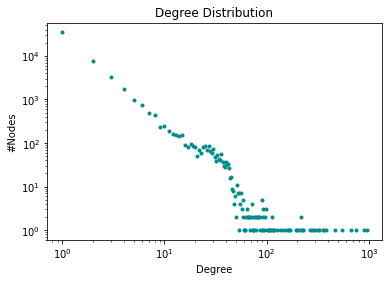

In [15]:
#plot deg distribution
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".", color = "darkcyan")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

Calculating best minimal value for power law fit


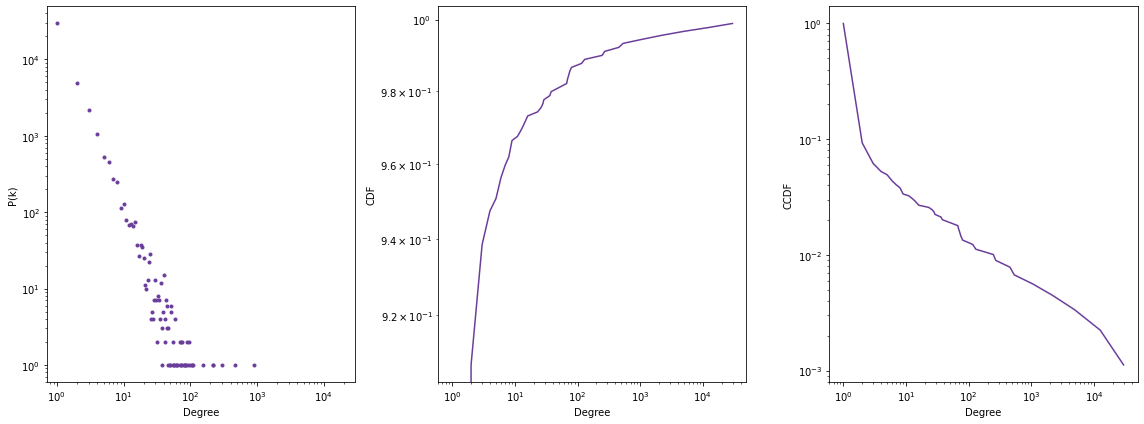

In [16]:
plot_dist(g)

In [17]:
# nodi con più alta degree distribution
dict_items = degree.items()

top10_degree = list(degree)[:10]
for i in top10_degree:
    print(degree[i], i)

949 djblackzitoun
893 realDonaldTrump
744 ayrinweloveyou
661 heatherhedera
550 tekwhiz
464 JoeBiden
379 realamadioha
361 yoksig
355 navy30vet
324 menchumfalls


In [18]:
# top 10 nodi in degree distribution
top_indegree = sorted(g.in_degree(),
reverse=True, key=itemgetter(1))[:10]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

893 realDonaldTrump
464 JoeBiden
302 Blklivesmatter
216 KamalaHarris
215 CNN
155 thehill
109 MSNBC
107 WhiteHouse
105 nytimes
99 POTUS


In [19]:
# top 10 nodi out degree distribution
top_outdegree = sorted(g.out_degree(),
reverse=True, key=itemgetter(1))[:10]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_outdegree)))

949 djblackzitoun
744 ayrinweloveyou
661 heatherhedera
550 tekwhiz
379 realamadioha
360 yoksig
355 navy30vet
324 menchumfalls
322 missionaryblmm
289 safikhanmagical


## Connected Component



In [20]:
comps = list(nx.connected_components(g.to_undirected()))
print("Number of connected components: ", len(comps))

Number of connected components:  3138


In [21]:
comps_sorted = sorted(comps, key=len, reverse = True)


In [22]:
print("Number of users in the biggest connected component: ", len(max(comps_sorted)))

Number of users in the biggest connected component:  38444


In [23]:
print("Number of users in the biggest connected component: ", len(comps_sorted[1]))

Number of users in the biggest connected component:  168


In [24]:
print("Number of users in the biggest connected component: ", len(comps_sorted[2]))

Number of users in the biggest connected component:  157


In [25]:
biggest_comp = nx.Graph()
biggest_comp_cc = nx.subgraph(g, comps_sorted[0]) 


In [26]:
nx.write_gexf(g, "biggest_comp_cc.gexf")

## Ego network analysis

In [27]:
list(g.neighbors("djblackzitoun"))


['PetalsTm',
 'Wewillrocku66',
 'insaurraldeh',
 'RosaTrunk',
 'RebeccaLMahan',
 'SergioA60798547',
 'Silviadomi22G',
 'SolyMar66091744',
 'Bella_Ely_',
 'MarkBird17',
 'Cassandra_Jully',
 'DrNikolova_Rumi',
 'MohammedNahir',
 'ManishP60508798',
 'visit_marrakech',
 'JohnLukeNYC',
 'HARRYS1DEMPIRE',
 'SueliRizzi3',
 'lumpie125',
 'tripletsfan19',
 'Zeno_Mello',
 'EjazNoorii',
 'CAA_Official',
 'BeatriceLacy',
 'BP_Maroc',
 'Angel_Stockler',
 'WALLI27',
 'marinavibu609g',
 'Citibank',
 'YNHallak',
 'LuisMiguelClav1',
 'italianostyle2',
 'sherrig108',
 'cjnapoet',
 'twizmwhytepiece',
 'jet_new',
 'ranasilvia63',
 'Cathhewat123',
 'MalibuSelfies',
 'CaroHasim',
 'DrJimmyStar',
 'SSscoop475',
 'Flow_bl',
 'LadyYAZNE',
 'Seaclare115',
 'Paula_Piccard',
 'ruby2015xo',
 'babybondgirl',
 'Genn_Scog',
 'PatrioticKHANN',
 'fff210219381',
 'wiergeezy',
 'Wrix2',
 'otrogoga60',
 '_____YO_____YO',
 'YYOOUUSSU',
 'PattiBrookd',
 'Luna_Om90',
 'MartinG8177',
 'nwfap',
 'r95731',
 'MaribellaAngels',
 

In [28]:
ego = nx.ego_graph(g, "djblackzitoun") 


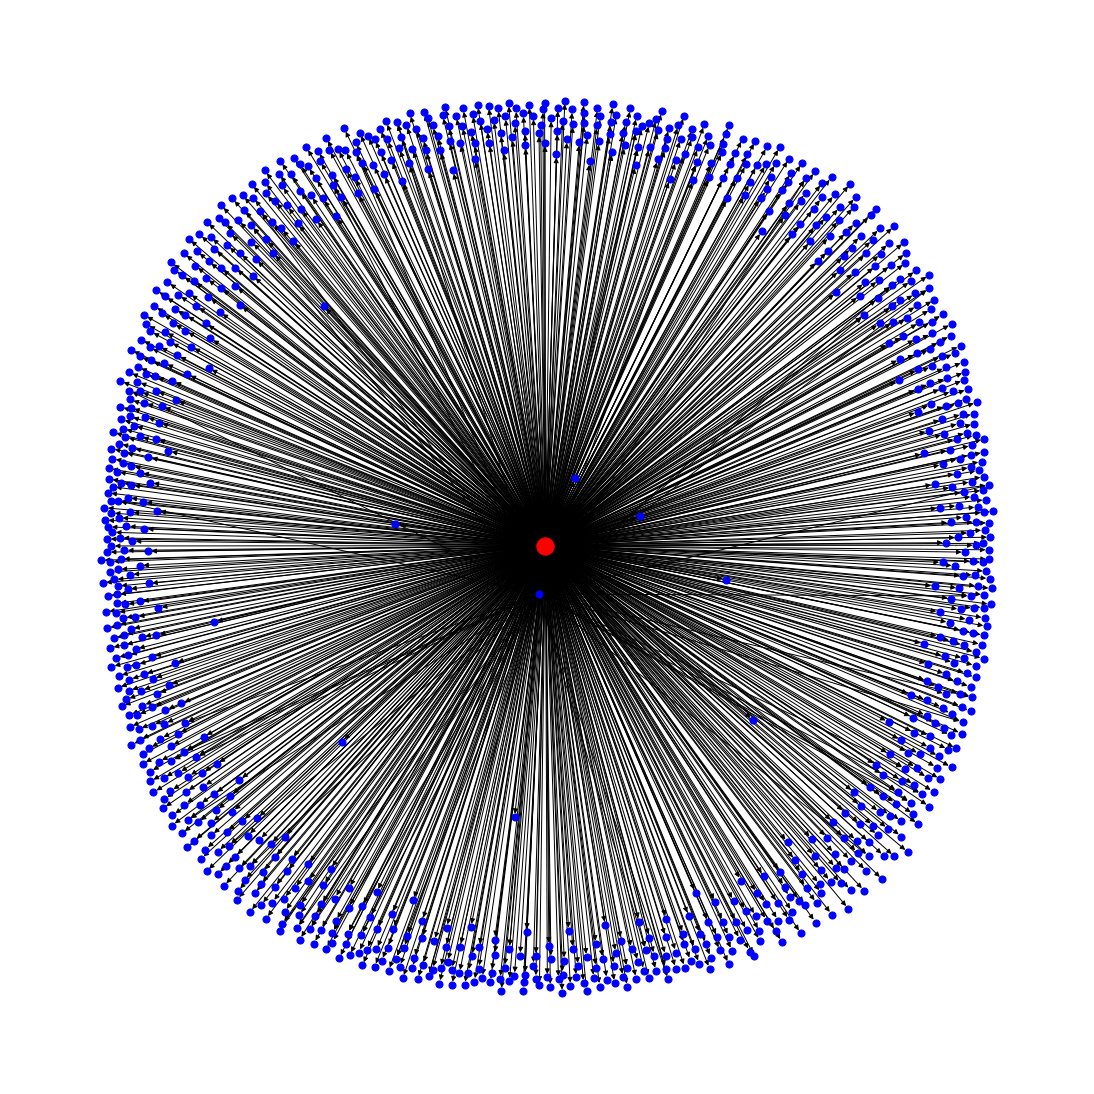

In [29]:
# find node with largest degree
node_and_degree = g.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

hub_ego = nx.ego_graph(g, largest_hub)
plt.figure(figsize=(15,15))
# Draw graph
pos = nx.spring_layout(hub_ego, seed=42)  # Seed layout for reproducibility
g_ego = nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

options = {"node_size": 300, "node_color": "r", }
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

nx.write_graphml(g_ego, "ego_net")


In [13]:
weakly_connected_comp = sorted(nx.weakly_connected_components(g), reverse=True) 
#the portion of a directed graph in which there is a path from each vertex to another vertex
strongly_connected_comp = sorted(nx.strongly_connected_components(g), reverse=True)

In [16]:
weakly_connected_comp

[{'RefugeCharity',
  'starstrickenSF',
  'DDAECHWlTA',
  'linkord',
  'GregGodwin11',
  'blmphxmetro',
  'laceyladi2',
  'EmiliWinst',
  'ppolenberg',
  'VeraSemperDic',
  'asclepiasyriaca',
  'hesokuh',
  'Adam_Puzio',
  'BiggKing24',
  'ringer',
  'alkanomega',
  'shicklgruber14',
  'mskaryn13',
  'kgradyback2life',
  'WashNews',
  'moromooluwa',
  'mikejmartin',
  'EmmaSengsta',
  'michelelife13',
  'dalene1113',
  'IshaqAslam6',
  'aelinfeelings',
  'SustainergyA',
  'angelabann95',
  'fam4fun',
  'donmega1833',
  'SAEBOMSPUTA',
  'HubertLinssen1',
  'JennyDazz23',
  'guardian_elite',
  'Aminal31858018',
  'NotoriousVOG',
  'FaltasLab',
  'renjunsfiower',
  'echin21',
  'PontiacMadeDDG',
  'lpbragancabr',
  'OddemocracyA',
  'bibi13113',
  'Bill20859071',
  'BettyGG11',
  'Kristennetten',
  'Shitelotte',
  'ieatyves_',
  'williamcson',
  'vm1nkoo',
  'WillBlackWriter',
  'Anie_Wall',
  'soworem',
  'GuySandstrm',
  'BlackWomenInAI',
  'charlie_adler',
  'hawkhopkins12',
  'lotus__2

In [31]:
# strongly connected component with the property that a random walker on the graph will never leave the component, once it enters the component.
len(sorted(nx.attracting_components(g), reverse=True))

39882

In [32]:
len(strongly_connected_comp)

52770

### Path Analysis


In [33]:
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
diameter

5

In [35]:
comps = list(nx.connected_components(g_cc))
print("Number of Connected Components (g): ", len(comps))

#max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
print("Average shortest path (g):", nx.average_shortest_path_length(g.subgraph(comps[0])))
print("Average shortest path weighted (g):", nx.average_shortest_path_length(g.subgraph(comps[0]), weight='weight'))

Number of Connected Components (g):  3138
Average shortest path (g): 5.645364911480924e-05
Average shortest path weighted (g): 5.645364911480924e-05


In [36]:
nx.shortest_path(g, source="henryogoti", target="ckisuke")

['henryogoti', 'ckisuke']

In [37]:
path = nx.shortest_path(g, source="heatherhedera",target="KamalaHarris")

In [38]:
path

['heatherhedera', 'KamalaHarris']

In [39]:
nx.shortest_path(g)

{'motor_felipe': {'motor_felipe': ['motor_felipe'],
  'allanldsantos': ['motor_felipe', 'allanldsantos'],
  'realDonaldTrump': ['motor_felipe', 'realDonaldTrump'],
  'gugachacra': ['motor_felipe', 'gugachacra'],
  'realpfigueiredo': ['motor_felipe', 'realpfigueiredo'],
  'tercalivre': ['motor_felipe', 'tercalivre'],
  'ICEgov': ['motor_felipe', 'ICEgov'],
  'USCIS': ['motor_felipe', 'USCIS'],
  'jairbolsonaro': ['motor_felipe', 'jairbolsonaro'],
  'jorgersm': ['motor_felipe', 'jorgersm'],
  'opropriolavo': ['motor_felipe', 'opropriolavo'],
  'LorenzonItalo': ['motor_felipe', 'LorenzonItalo'],
  'Biakicis': ['motor_felipe', 'Biakicis'],
  'kimpaim': ['motor_felipe', 'kimpaim'],
  'BolsonaroSP': ['motor_felipe', 'BolsonaroSP'],
  'GFiuza_Oficial': ['motor_felipe', 'GFiuza_Oficial'],
  'Annakhait': ['motor_felipe', 'Annakhait'],
  'AnaPaulaVolei': ['motor_felipe', 'AnaPaulaVolei'],
  'bernardokuster2': ['motor_felipe', 'bernardokuster2'],
  'opropriofaka': ['motor_felipe', 'opropriofaka']

In [40]:
nx.shortest_path_length(g, source="heatherhedera",target="KamalaHarris")

1

### Clustering Coefficient and Density analysis
* clustering coeff: (3*triplets)/(triangles)
* density: how much is the number of edges near to LMAX?

In [41]:
def clust_coeff_density_info(g):
    print("Average clustering coeff: ", nx.average_clustering(g))
    print("Density': ", nx.density(g))

In [43]:
clust_coeff_density_info(g_cc)

Average clustering coeff:  0.028971205395700868
Density':  5.8148879105155926e-05


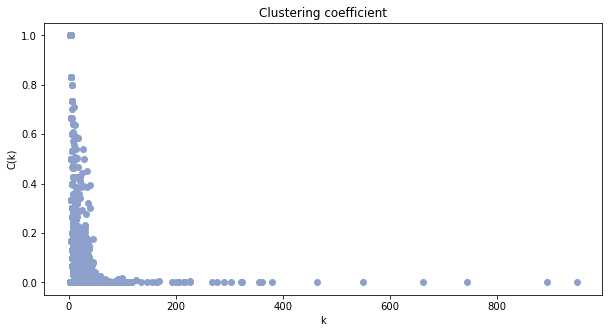

In [100]:
degrees = g_cc.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(g_cc,node)
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(10,5))
plt.scatter(x, y, color = "#8DA0CB")

plt.xlabel("k")
plt.ylabel("C(k)")
plt.title("Clustering coefficient")
plt.show()

## Centrality Analysis

### Degree Centrality

In [101]:
degrees = dict(g.degree())

In [102]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]


In [139]:
def plot_barplot(l, n = 10):
    '''l = list'''
    label = list(zip(*l))[0]
    label_top = label[:n]
    score = list(zip(*l))[1]
    score_top = score[:n]
    plt.figure(figsize=(16,7))
    x_pos = np.arange(len(label_top)) 
    plt.bar(x_pos, score_top, color = "#BCE4D7")
    plt.xlabel("Twitter users")
    plt.xticks(x_pos, label_top, rotation = 15, fontsize=10) 
    plt.ylabel('Popularity Score', fontsize = 10)
    plt.show()

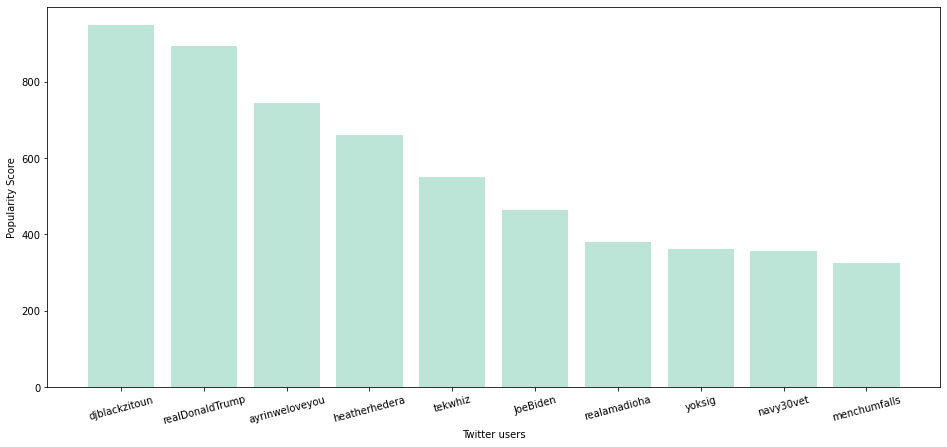

In [140]:
plot_barplot(ranks)

### Closeness Centrality

In [105]:
closeness = nx.closeness_centrality(g)

In [106]:
ranks_cc = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]

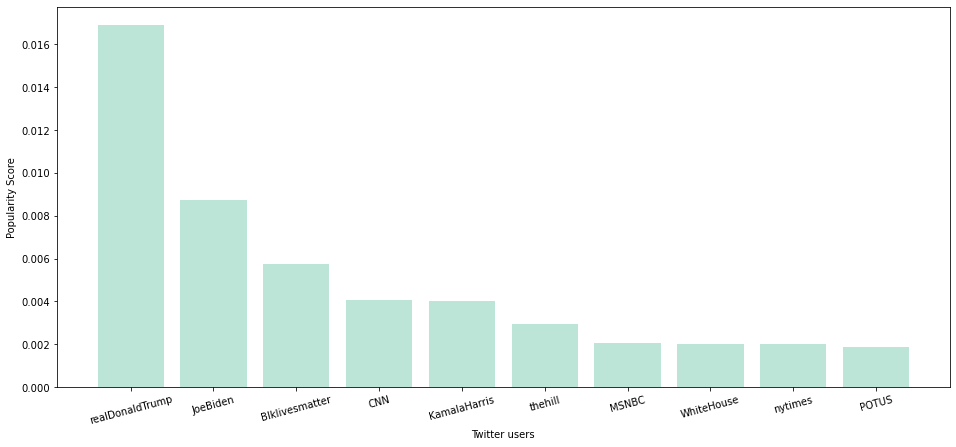

In [143]:
plot_barplot(ranks_cc, 10)

In [78]:
# with open('json/closeness.pickle', 'wb') as handle:
#     pickle.dump(closeness, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [79]:
with open("json/closeness.pickle", 'rb') as handle:
    closeness = pickle.load(handle)

### Betweenness Centrality

In [108]:
betweenness = nx.betweenness_centrality(g_cc)

In [109]:
ranks_b = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]

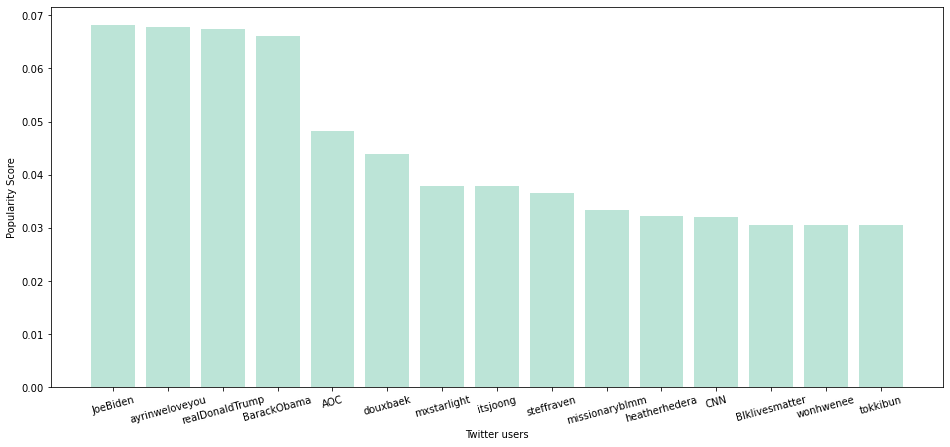

In [142]:
plot_barplot(ranks_b, 15)

In [111]:
with open('json/betweenness_centrality.pickle', 'wb') as handle:
    pickle.dump(betweenness, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open("json/betweenness_centrality.pickle", 'rb') as handle:
    betweenness = pickle.load(handle)

### Harmonic Centrality

In [112]:
harmonic = nx.harmonic_centrality(g)

In [113]:
ranks_harmonic = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]

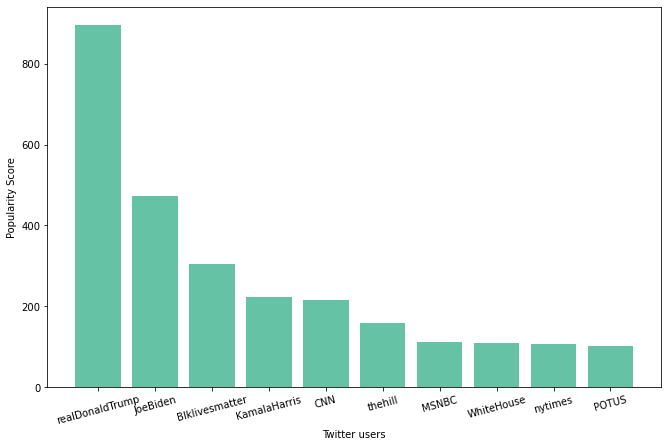

In [114]:
plot_barplot(ranks_harmonic, 10)

In [118]:
with open('json/harmonic.pickle', 'wb') as handle:
    pickle.dump(harmonic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
f = open("plots/harmonic.json",)

harmonic_centrality = json.load(f)


### PageRank

In [119]:
pagerank = nx.pagerank(g_cc)

In [120]:
ranks_pr = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]

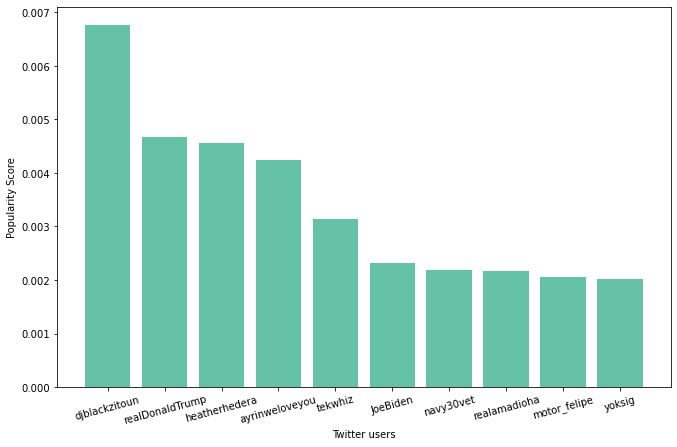

In [121]:
plot_barplot(ranks_pr, 10)

In [122]:
with open('json/page_rank.pickle', 'wb') as handle:
    pickle.dump(pagerank, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Eigenvector

In [127]:
g = nx.Graph(g)
eigen = nx.eigenvector_centrality(g.to_undirected())

In [128]:
ranks_ev = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]

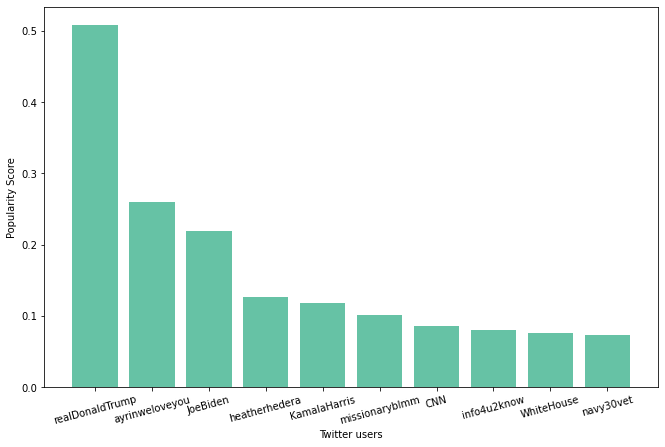

In [129]:
plot_barplot(ranks_ev, 10)

### Assortativity

In [17]:
from random import sample

G = g.to_undirected().copy()
conn_comps = sorted(nx.connected_components(G), key=len, reverse=True) 
G.remove_nodes_from([n for n in G if n not in set(conn_comps[0])])

sampled_nodes = sample(G.nodes, 25000)  
G.remove_nodes_from([n for n in G if n not in set(sampled_nodes)])

conn_comps_sample = sorted(nx.connected_components(G), key=len, reverse=True)
G.remove_nodes_from([n for n in G if n not in set(conn_comps_sample[0])])

In [82]:
nx.degree_assortativity_coefficient(G)

-0.13116398887015124

In [83]:
knn = nx.k_nearest_neighbors(G) #calculate the average nearest neighbor degree of nodes with degree k.
knn = dict(sorted(knn.items()))

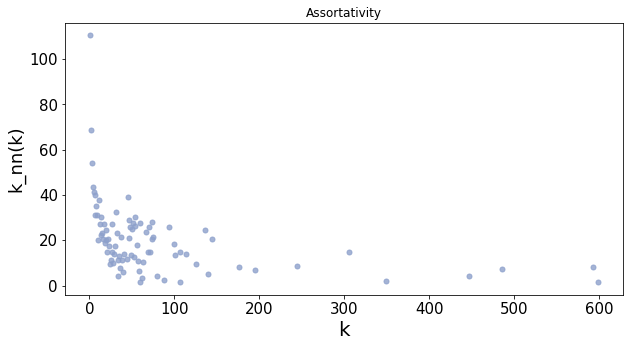

In [99]:
plt.figure(figsize=(10,5))

plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8, color = "#8DA0CB")
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Assortativity")
plt.show()